## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# loading data
df = pd.read_csv('train.csv')
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
323242,1001755,P00062742,F,18-25,4,B,4+,0,8,17.0,NaN,8014
281756,1001413,P00148642,M,18-25,3,B,1,1,6,10.0,13.0,20074
26487,1004049,P00320942,M,46-50,11,A,3,1,1,4.0,9.0,11847
3988,1000655,P00195342,F,26-35,2,B,2,0,2,5.0,NaN,3710
534167,1004246,P00217742,F,36-45,7,C,0,0,5,14.0,NaN,5327
487264,1003115,P00101942,M,36-45,17,C,4+,1,8,17.0,NaN,5885
241223,1001197,P00366542,M,36-45,1,C,1,0,5,NaN,NaN,8600
366732,1002447,P00227942,M,26-35,14,C,1,1,2,5.0,NaN,9905
519880,1002010,P00026142,M,18-25,4,B,0,0,5,NaN,NaN,5159
511144,1000767,P00014542,M,26-35,12,C,1,0,8,NaN,NaN,9967


In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Data Understanding

In [4]:
df.shape

(550068, 12)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# checking any null values present
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

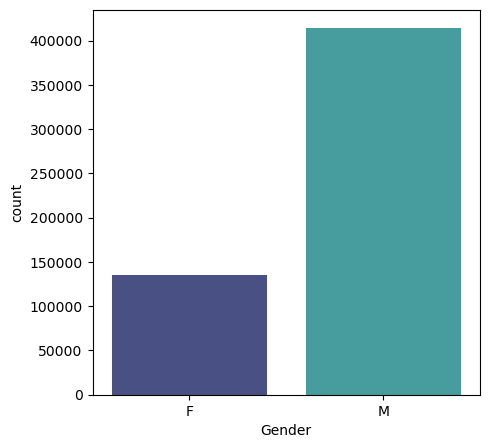

In [8]:
# The Countplot shows the occurance of the gender in the dataset
plt.figure(figsize= (5,5))
sns.countplot(data= df, x= 'Gender', palette= 'mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

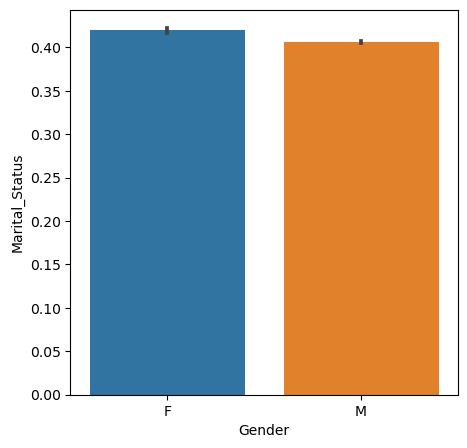

In [9]:
plt.figure(figsize= (5,5))
sns.barplot(x= 'Gender', y= 'Marital_Status', data= df)

<Axes: xlabel='Gender', ylabel='Purchase'>

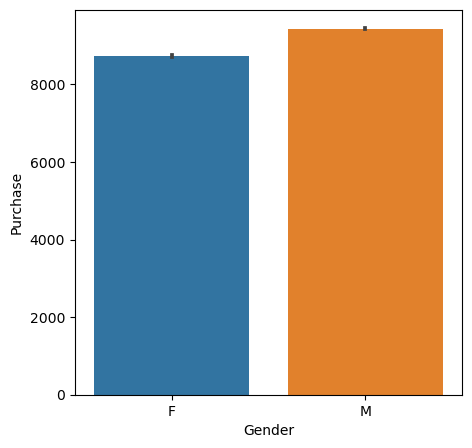

In [10]:
plt.figure(figsize= (5,5))
sns.barplot(x= df['Gender'], y= df['Purchase'])

<Axes: xlabel='Occupation', ylabel='Purchase'>

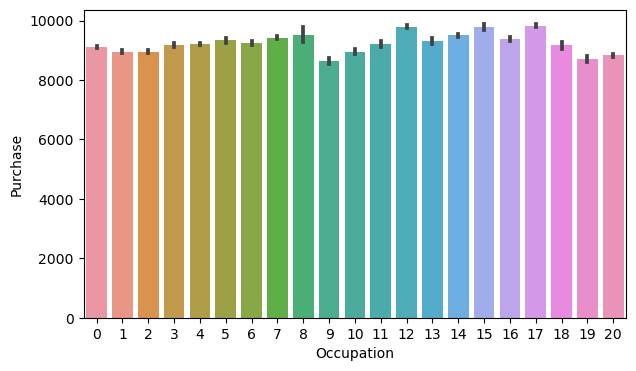

In [11]:
plt.figure(figsize= (7, 4))
sns.barplot(x= df['Occupation'], y= df['Purchase'])

<Axes: xlabel='Occupation', ylabel='Purchase'>

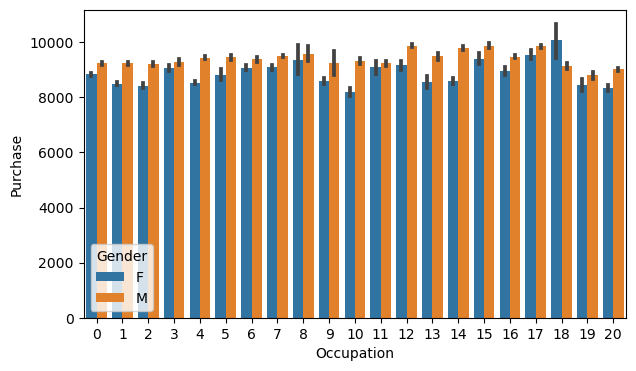

In [12]:
plt.figure(figsize= (7,4))
sns.barplot(x= df['Occupation'], y= df['Purchase'], hue= df['Gender'])

# Outlier Detection

Checking the presence of outliers using Boxplot

<Axes: xlabel='Gender', ylabel='Purchase'>

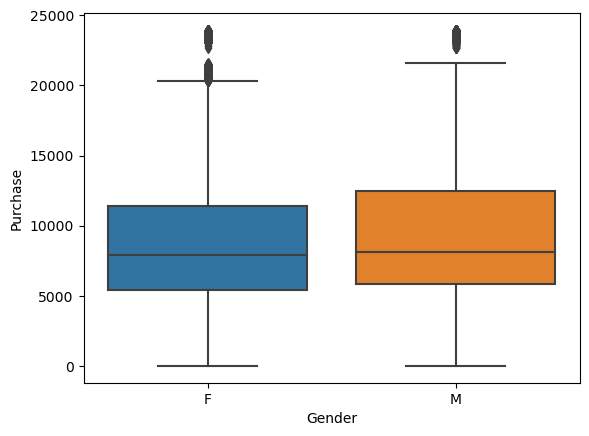

In [13]:
#plt.figure(figsize= (10,6))
sns.boxplot(x= df['Gender'], y= df['Purchase'])

<Axes: xlabel='Occupation', ylabel='Purchase'>

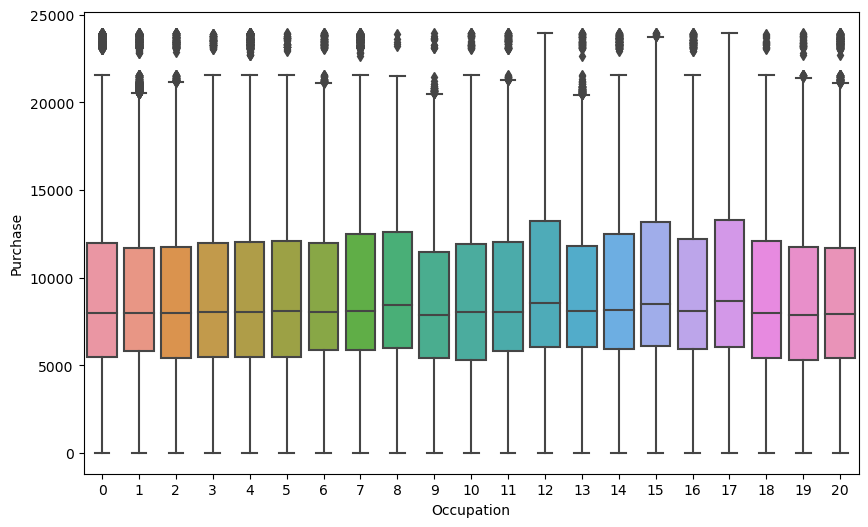

In [14]:
plt.figure(figsize= (10,6))
sns.boxplot(x= df['Occupation'], y= df['Purchase'])

As we can above there are outliers present in the Purchase column

<Axes: xlabel='Age', ylabel='Purchase'>

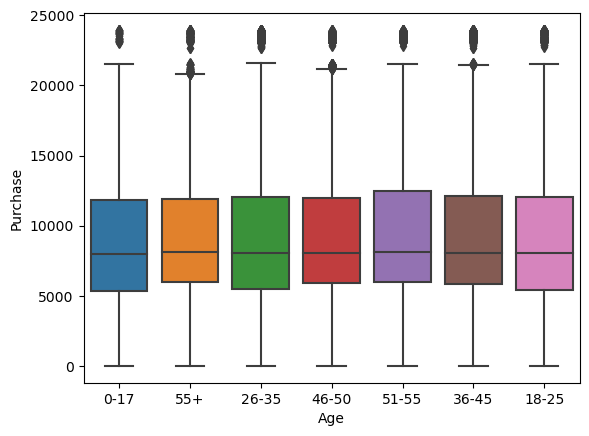

In [15]:
# plt.figure(figsize= (10,6))
sns.boxplot(x= df['Age'], y= df['Purchase'])

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

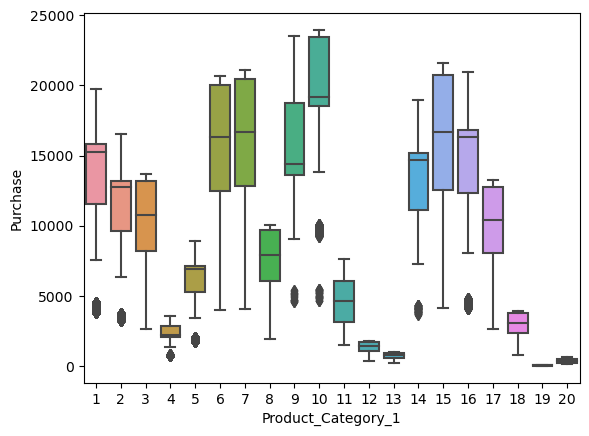

In [16]:
sns.boxplot(x= df['Product_Category_1'], y= df['Purchase'])

# Data Preprocessing

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
# Replacing 'P00' with no value and the scaling the ProductId column
df['Product_ID'] = df['Product_ID'].astype(str).str.replace('P00', '')

ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1,1))


In [19]:
# As there are more than 50% missing values in 'Product_Category_3' we are dropping the column
df.drop(['Product_Category_3'], axis=1, inplace= True)

In [20]:
# the missing data in the 'Product_Category_2' column have been imputed using mean
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [21]:
# checking any missing value present
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969


In [23]:
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

# Label Encoding - using it to turn categorical variables to numeric values

In [24]:
cat_cols = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()

for i in cat_cols:
    df[i] = le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [25]:
# Values in Stay_In_Current_City_Years are changed from 4+ to 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [26]:
# the following columns are changed to int
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [27]:
df['City_Category'] = df['City_Category'].astype('category')

In [28]:
df.dtypes

User_ID                          int64
Product_ID                     float64
Gender                           int32
Age                              int32
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years       int32
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Purchase                         int64
dtype: object

# Distribution Plot

C:\Users\mriga\AppData\Local\Temp\ipykernel_18448\3809425496.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax= ax[i][j])
C:\Users\mriga\AppData\Local\Temp\ipykernel_18448\3809425496.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax= ax[i][j])
C:\Users

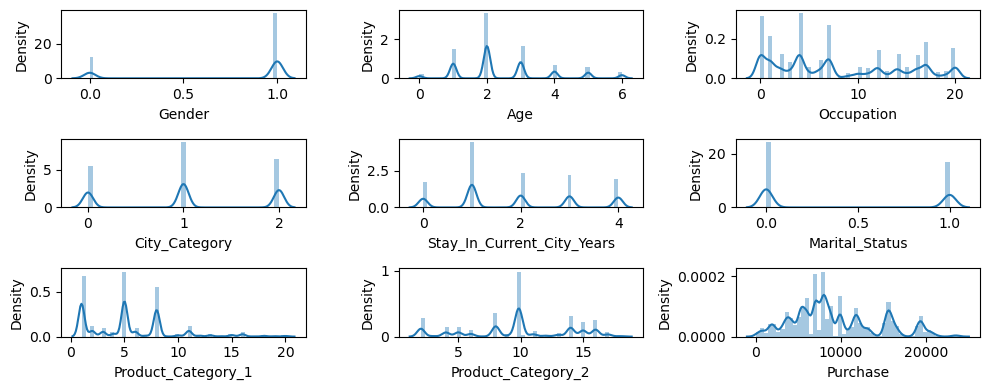

In [29]:
rows = 3
cols = 3

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize= (10,4))
col = df.columns
index = 2

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax= ax[i][j])
        index= index + 1
        
plt.tight_layout()

# Log Transformation

In [30]:
# using log transformation to transform the data to normal distribution
df['Purchase'] = np.log(df['Purchase'])

In [31]:
df = pd.get_dummies(df)  # convert categorical column variable into dummy variable

In [32]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,0,1,0
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,0,0,1
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,0,1,0
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,0,0,1


Train test split

In [33]:
# data is split into X & y, where independent and dependent have been seperated
X = df.drop(labels= ['Purchase'], axis=1)
y = df['Purchase']


In [34]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [35]:
y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

training & test data has been split into 8:2 ratio

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (440054, 12)
X_test shape (110014, 12)
y_train shape (440054,)
y_test shape (110014,)


Scaling the data

In [37]:
scaled  = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [38]:
X_test

array([[-1.57539367, -0.78959714,  0.5724713 , ..., -0.60571138,
        -0.85075387,  1.48597293],
       [-0.31799543, -0.75456299,  0.5724713 , ...,  1.65095132,
        -0.85075387, -0.67295977],
       [-1.6778612 , -0.43633608,  0.5724713 , ..., -0.60571138,
        -0.85075387,  1.48597293],
       ...,
       [ 0.72809969, -1.01829232,  0.5724713 , ..., -0.60571138,
         1.1754281 , -0.67295977],
       [-1.63444276, -1.45232657,  0.5724713 , ..., -0.60571138,
         1.1754281 , -0.67295977],
       [ 0.53821635, -0.6368093 ,  0.5724713 , ..., -0.60571138,
         1.1754281 , -0.67295977]])

# Machine Learning

Linear Regression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_predict = model.predict(X_test)

In [41]:
y_test.describe()

count    110014.000000
mean          8.938958
std           0.745581
min           2.484907
25%           8.669914
50%           8.992806
75%           9.397960
max          10.084183
Name: Purchase, dtype: float64

In [42]:
y_predict

array([9.34876116, 8.4890021 , 8.9483095 , ..., 9.36211001, 9.36037051,
       8.94618594])

In [43]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

print('r2_score : ',score)
print('mean_absolute_error : ',mae)
print('mean_squared_error : ',mse)
print('root_mean_squared_error : ',rmse)

r2_score :  0.20164554932059042
mean_absolute_error :  0.45564101848200156
mean_squared_error :  0.44379455972337145
root_mean_squared_error :  0.6661790748165026


The above evaluation metrics help us to find how well our model is performing. As we can see the r2_score is only 0.20 and the root_square_mean is high. The model is not very accurate to predict the purchases or the taget column

## Decision Tree Regressor

In [44]:
DT = DecisionTreeRegressor(max_depth=9)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [45]:
# predicting train
train_preds = DT.predict(X_train)

# predicting on test
test_preds = DT.predict(X_test)

In [46]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_preds)))
             
print("RMSE Trainging Data = ",str(RMSE_train))
print("RMSE Test Data = ",str(RMSE_test))
print('_'*50)
print("RSquared value on train: ",DT.score(X_train, y_train))
print("RSquared value on test: ",DT.score(X_test, y_test))

RMSE Trainging Data =  0.3680408214406252
RMSE Test Data =  0.36895452846861376
__________________________________________________
RSquared value on train:  0.7519510621944242
RSquared value on test:  0.7551165320579324


## Random Forest Regressor

In [47]:
RF = RandomForestRegressor().fit(X_train, y_train)

In [48]:
# predicting train
train_preds1 = RF.predict(X_train)

# predicting test
test_preds1 = RF.predict(X_test)

In [49]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(y_train, train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(y_test, test_preds1)))

print("RMSE Trainging Data = ",str(RMSE_train))
print("RMSE Test Data = ",str(RMSE_test))
print('_'*50)
print("RSquared value on train: ",DT.score(X_train, y_train))
print("RSquared value on test: ",DT.score(X_test, y_test))

RMSE Trainging Data =  0.13151691151625974
RMSE Test Data =  0.3496104080014506
__________________________________________________
RSquared value on train:  0.7519510621944242
RSquared value on test:  0.7551165320579324
